In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('srednjeni_podaci.csv', parse_dates=True)

In [2]:
df = df.drop(df.columns[0], axis=1)

In [3]:
df.set_index('godina', inplace=True)

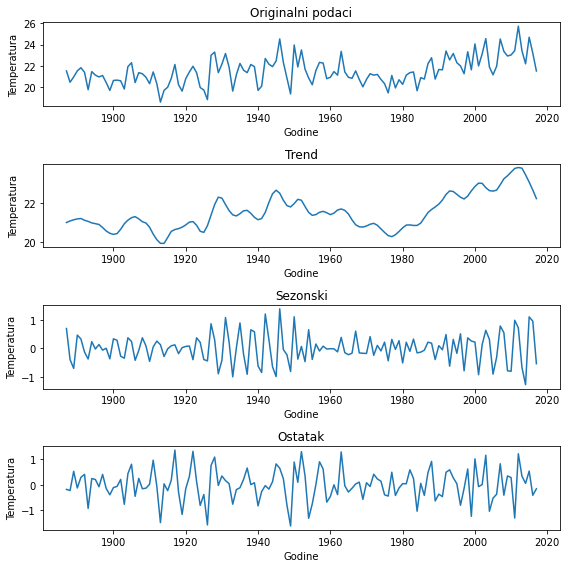

In [6]:


# Treniranje STL modela za leto sa postavljenom periodičnošću
stl_model_leto = STL(df['leto'], period=4)  # Postavljanje periodičnosti na 4 
result_leto = stl_model_leto.fit()

# Prikaz rezultata dekompozicije za leto
plt.figure(figsize=(8, 8)) 

# Originalni podaci
plt.subplot(4, 1, 1)
plt.plot(df['leto'])
plt.title('Originalni podaci')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Trend
plt.subplot(4, 1, 2)
plt.plot(result_leto.trend)
plt.title('Trend')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Sezonski
plt.subplot(4, 1, 3)
plt.plot(result_leto.seasonal)
plt.title('Sezonski')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Ostatak
plt.subplot(4, 1, 4)
plt.plot(result_leto.resid)
plt.title('Ostatak')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.savefig('rezultati_dekompozicije_leto.png')
plt.show()

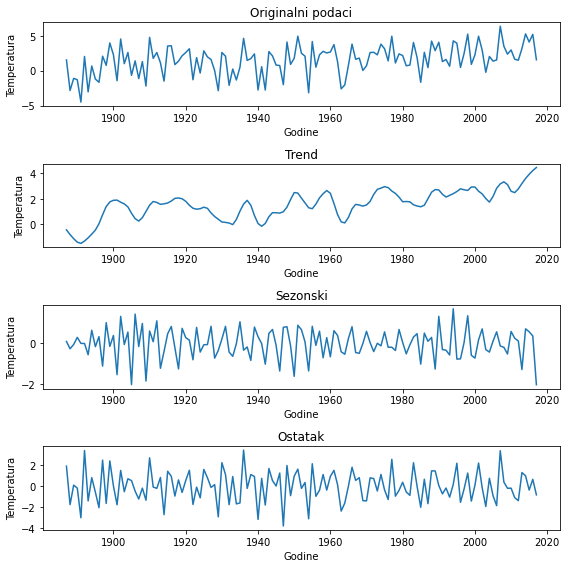

In [7]:
# Treniranje STL modela za zimu sa postavljenom periodičnošću
stl_model_zima = STL(df['zima'], period=4)  # Postavljanje periodičnosti na 4 
result_zima = stl_model_zima.fit()

# Prikaz rezultata dekompozicije za zimu
plt.figure(figsize=(8, 8)) 

# Originalni podaci
plt.subplot(4, 1, 1)
plt.plot(df['zima'])
plt.title('Originalni podaci')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Trend
plt.subplot(4, 1, 2)
plt.plot(result_zima.trend)
plt.title('Trend')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Sezonski
plt.subplot(4, 1, 3)
plt.plot(result_zima.seasonal)
plt.title('Sezonski')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Ostatak
plt.subplot(4, 1, 4)
plt.plot(result_zima.resid)
plt.title('Ostatak')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.savefig('rezultati_dekompozicije_zima.png')
plt.show()


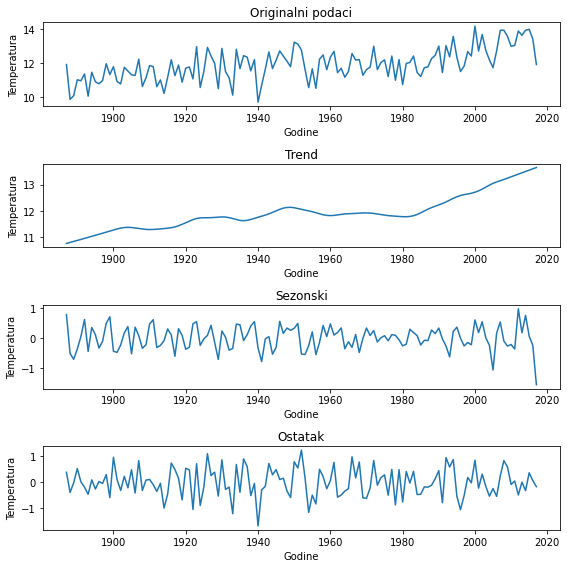

In [8]:
# Treniranje STL modela za kolonu "prosek" sa postavljenom periodičnošću
stl_model_prosek = STL(df['prosek'], period=12)  # Postavljanje periodičnosti na 12 
result_prosek = stl_model_prosek.fit()

# Prikaz rezultata dekompozicije za kolonu "prosek"
plt.figure(figsize=(8, 8)) 

# Originalni podaci
plt.subplot(4, 1, 1)
plt.plot(df['prosek'])
plt.title('Originalni podaci')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Trend
plt.subplot(4, 1, 2)
plt.plot(result_prosek.trend)
plt.title('Trend')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Sezonski
plt.subplot(4, 1, 3)
plt.plot(result_prosek.seasonal)
plt.title('Sezonski')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

# Ostatak
plt.subplot(4, 1, 4)
plt.plot(result_prosek.resid)
plt.title('Ostatak')
plt.xlabel('Godine')
plt.ylabel('Temperatura')

plt.tight_layout()
plt.savefig('rezultati_dekompozicije_prosek.png')
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error

# Računanje greške za zimu
zima_pred = result_zima.trend + result_zima.seasonal + result_zima.resid
mae_zima = mean_absolute_error(df['zima'], zima_pred)

# Računanje greške za leto
leto_pred = result_leto.trend + result_leto.seasonal + result_leto.resid
mae_leto = mean_absolute_error(df['leto'], leto_pred)

# Računanje greške za prosečne 
prosek_pred = result_prosek.trend + result_prosek.seasonal + result_prosek.resid
mae_prosek = mean_absolute_error(df['prosek'], prosek_pred)

print("Mean Absolute Error (MAE) za zimu:", mae_zima)
print("Mean Absolute Error (MAE) za leto:", mae_leto)
print("Mean Absolute Error (MAE) za prosečne vrednosti:", mae_prosek)

Mean Absolute Error (MAE) za zimu: 8.708047006124797e-17
Mean Absolute Error (MAE) za leto: 0.0
Mean Absolute Error (MAE) za prosečne vrednosti: 4.0679927619853064e-17


In [10]:
from sklearn.metrics import mean_squared_error

# Računanje greške za zimu
mse_zima = mean_squared_error(df['zima'], zima_pred)

# Računanje greške za leto
mse_leto = mean_squared_error(df['leto'], leto_pred)

# Računanje greške za prosečne vrednosti
mse_prosek = mean_squared_error(df['prosek'], prosek_pred)

print("Mean Squared Error (MSE) za zimu:", mse_zima)
print("Mean Squared Error (MSE) za leto:", mse_leto)
print("Mean Squared Error (MSE) za prosečne vrednosti:", mse_prosek)


Mean Squared Error (MSE) za zimu: 3.578407240182086e-32
Mean Squared Error (MSE) za leto: 0.0
Mean Squared Error (MSE) za prosečne vrednosti: 7.226206765383314e-32
